# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [44]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResUf',
       'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [49]:
sinasc_raw['APGAR5']

munResNome
Alta Floresta D'Oeste      10.0
Alta Floresta D'Oeste       9.0
Alta Floresta D'Oeste      10.0
Alto Alegre dos Parecis    10.0
Alta Floresta D'Oeste      10.0
                           ... 
Vilhena                     9.0
Chupinguaia                 9.0
Vilhena                    10.0
Vilhena                     9.0
Novo Horizonte do Oeste     8.0
Name: APGAR5, Length: 27028, dtype: float64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
mun_Norte = sinasc_raw[sinasc_raw['munResLat'] >= -10.5]['munResNome']
mun_Norte.unique()

array(['Ariquemes', 'Cujubim', 'Alto Paraíso', 'Monte Negro', 'Jaru',
       'Rio Crespo', 'Porto Velho', 'Cacaulândia', 'Itapuã do Oeste',
       'Buritis', 'Vale do Anari', 'Candeias do Jamari',
       "Machadinho D'Oeste", 'Nova Mamoré', 'Theobroma',
       'Vale do Paraíso'], dtype=object)

In [13]:
mun_Sul = sinasc_raw[sinasc_raw['munResLat'] < -10.5]['munResNome']
mun_Sul.unique()

array(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis',
       'Novo Horizonte do Oeste', 'Rolim de Moura', "São Felipe D'Oeste",
       'Ji-Paraná', 'Vilhena', 'Costa Marques', 'Campo Novo de Rondônia',
       'Colorado do Oeste', 'Urupá', 'Ouro Preto do Oeste', 'Corumbiara',
       'São Miguel do Guaporé', 'Governador Jorge Teixeira',
       "Santa Luzia D'Oeste", 'Pimenta Bueno', 'Mirante da Serra',
       'Cerejeiras', 'Presidente Médici', 'Cacoal', 'Parecis',
       "Espigão D'Oeste", 'São Francisco do Guaporé',
       'Ministro Andreazza', "Nova Brasilândia D'Oeste",
       "Alvorada D'Oeste", 'Primavera de Rondônia', 'Seringueiras',
       'Castanheiras', 'Chupinguaia', 'Guajará-Mirim', 'Nova União',
       'Teixeirópolis', 'Pimenteiras do Oeste', 'Cabixi'], dtype=object)

In [14]:
faixas = {key: "Norte" for key in mun_Norte}
faixas.update({key: "Sul" for key in mun_Sul})
faixas

{'Ariquemes': 'Norte',
 'Cujubim': 'Norte',
 'Alto Paraíso': 'Norte',
 'Monte Negro': 'Norte',
 'Jaru': 'Norte',
 'Rio Crespo': 'Norte',
 'Porto Velho': 'Norte',
 'Cacaulândia': 'Norte',
 'Itapuã do Oeste': 'Norte',
 'Buritis': 'Norte',
 'Vale do Anari': 'Norte',
 'Candeias do Jamari': 'Norte',
 "Machadinho D'Oeste": 'Norte',
 'Nova Mamoré': 'Norte',
 'Theobroma': 'Norte',
 'Vale do Paraíso': 'Norte',
 "Alta Floresta D'Oeste": 'Sul',
 'Alto Alegre dos Parecis': 'Sul',
 'Novo Horizonte do Oeste': 'Sul',
 'Rolim de Moura': 'Sul',
 "São Felipe D'Oeste": 'Sul',
 'Ji-Paraná': 'Sul',
 'Vilhena': 'Sul',
 'Costa Marques': 'Sul',
 'Campo Novo de Rondônia': 'Sul',
 'Colorado do Oeste': 'Sul',
 'Urupá': 'Sul',
 'Ouro Preto do Oeste': 'Sul',
 'Corumbiara': 'Sul',
 'São Miguel do Guaporé': 'Sul',
 'Governador Jorge Teixeira': 'Sul',
 "Santa Luzia D'Oeste": 'Sul',
 'Pimenta Bueno': 'Sul',
 'Mirante da Serra': 'Sul',
 'Cerejeiras': 'Sul',
 'Presidente Médici': 'Sul',
 'Cacoal': 'Sul',
 'Parecis': 'Su

In [37]:
sinasc_raw = sinasc_raw.set_index('munResNome')

In [51]:
sinasc_raw.groupby(faixas)[['PESO','APGAR5']].agg(['max', 'min', 'mean', 'median', 'std', 'var']).round(1)

PESO                                       APGAR5            \
             max  min    mean  median    std       var    max  min mean   
munResNome                                                                
Norte       5190  295  3246.1  3275.0  556.5  309678.6   10.0  0.0  9.2   
Sul         5985  258  3240.1  3270.0  531.8  282827.3   10.0  0.0  9.1   

                             
           median  std  var  
munResNome                   
Norte         9.0  0.8  0.6  
Sul           9.0  0.8  0.6

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [60]:
maior_3000 = sinasc_raw[sinasc_raw['munResArea'] >= 3000].index
menor_3000 = sinasc_raw[sinasc_raw['munResArea'] < 3000].index

In [67]:
tamanhos = {key: ">3000" for key in maior_3000}
tamanhos.update({key: "0-3000" for key in menor_3000})
tamanhos

{"Alta Floresta D'Oeste": '>3000',
 'Alto Alegre dos Parecis': '>3000',
 'Ariquemes': '>3000',
 'Cujubim': '>3000',
 'Porto Velho': '>3000',
 'Itapuã do Oeste': '>3000',
 'Ji-Paraná': '>3000',
 'Buritis': '>3000',
 'Vilhena': '>3000',
 'Vale do Anari': '>3000',
 'Candeias do Jamari': '>3000',
 'Costa Marques': '>3000',
 'Campo Novo de Rondônia': '>3000',
 "Machadinho D'Oeste": '>3000',
 'Nova Mamoré': '>3000',
 'Corumbiara': '>3000',
 'São Miguel do Guaporé': '>3000',
 'Governador Jorge Teixeira': '>3000',
 'Pimenta Bueno': '>3000',
 'Cacoal': '>3000',
 "Espigão D'Oeste": '>3000',
 'São Francisco do Guaporé': '>3000',
 "Alvorada D'Oeste": '>3000',
 'Seringueiras': '>3000',
 'Chupinguaia': '>3000',
 'Guajará-Mirim': '>3000',
 'Pimenteiras do Oeste': '>3000',
 'Novo Horizonte do Oeste': '0-3000',
 'Rolim de Moura': '0-3000',
 "São Felipe D'Oeste": '0-3000',
 'Alto Paraíso': '0-3000',
 'Monte Negro': '0-3000',
 'Jaru': '0-3000',
 'Rio Crespo': '0-3000',
 'Cacaulândia': '0-3000',
 'Colorad

In [68]:
sinasc_raw.groupby(tamanhos)[['PESO','APGAR5']].agg(['max', 'min', 'mean', 'median', 'std', 'var']).round(1)

PESO                                       APGAR5            \
             max  min    mean  median    std       var    max  min mean   
munResNome                                                                
0-3000      5720  258  3218.4  3245.0  531.6  282580.6   10.0  0.0  9.1   
>3000       5985  292  3249.1  3280.0  547.7  299993.5   10.0  0.0  9.2   

                             
           median  std  var  
munResNome                   
0-3000        9.0  0.8  0.6  
>3000         9.0  0.8  0.6

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [69]:
altas = sinasc_raw[sinasc_raw['munResAlt'] >= 200].index
baixas = sinasc_raw[sinasc_raw['munResAlt'] < 200].index

In [70]:
altitude = {key: ">200" for key in altas}
altitude.update({key: "0-200" for key in baixas})
altitude

{"Alta Floresta D'Oeste": '>200',
 'Alto Alegre dos Parecis': '>200',
 'Novo Horizonte do Oeste': '>200',
 'Rolim de Moura': '>200',
 "São Felipe D'Oeste": '>200',
 'Vilhena': '>200',
 'Campo Novo de Rondônia': '>200',
 'Colorado do Oeste': '>200',
 'Ouro Preto do Oeste': '>200',
 'Corumbiara': '>200',
 'Governador Jorge Teixeira': '>200',
 "Santa Luzia D'Oeste": '>200',
 'Mirante da Serra': '>200',
 'Cerejeiras': '>200',
 'Parecis': '>200',
 "Espigão D'Oeste": '>200',
 'Ministro Andreazza': '>200',
 "Nova Brasilândia D'Oeste": '>200',
 'Primavera de Rondônia': '>200',
 'Castanheiras': '>200',
 'Chupinguaia': '>200',
 'Nova União': '>200',
 'Cabixi': '>200',
 'Ariquemes': '0-200',
 'Cujubim': '0-200',
 'Alto Paraíso': '0-200',
 'Monte Negro': '0-200',
 'Jaru': '0-200',
 'Rio Crespo': '0-200',
 'Porto Velho': '0-200',
 'Cacaulândia': '0-200',
 'Itapuã do Oeste': '0-200',
 'Ji-Paraná': '0-200',
 'Buritis': '0-200',
 'Vale do Anari': '0-200',
 'Candeias do Jamari': '0-200',
 'Costa Marque

In [71]:
sinasc_raw.groupby(altitude)[['PESO','APGAR5']].agg(['max', 'min', 'mean', 'median', 'std', 'var']).round(1)

PESO                                       APGAR5            \
             max  min    mean  median    std       var    max  min mean   
munResNome                                                                
0-200       5480  292  3248.8  3275.0  546.0  298149.2   10.0  0.0  9.2   
>200        5985  258  3224.4  3260.0  540.1  291717.1   10.0  0.0  9.1   

                             
           median  std  var  
munResNome                   
0-200         9.0  0.8  0.6  
>200          9.0  0.8  0.7

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [78]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [84]:
sinasc_raw['intermediarias'] = intermediarias

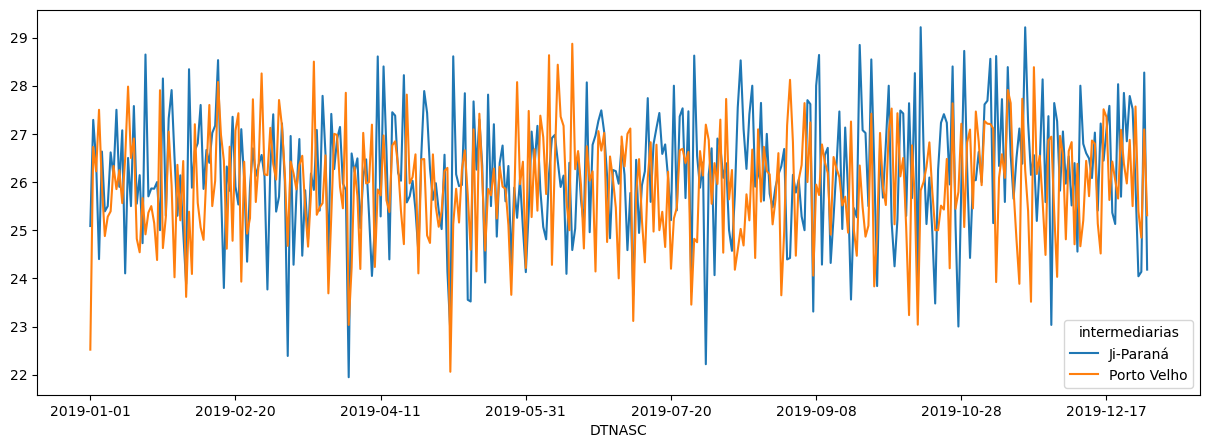

In [88]:
sinasc_raw.groupby(['DTNASC', 'intermediarias'])['IDADEMAE'].mean().unstack().plot(figsize=[15,5]);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [93]:
idh_RO = pd.read_excel('IDH-RO.xlsx')
idh_RO = idh_RO.dropna()
idh_RO

,Municipio,IDH
0,Porto Velho,0.736
1,Vilhena,0.731
2,Cacoal,0.718
3,Ji-Paraná,0.714
4,Pimenta Bueno,0.710
5,Ariquemes,0.702
6,Rolim de Moura,0.700
8,Cerejeiras,0.692
9,Jaru,0.689
10,Colorado do Oeste,0.685


In [98]:
idh_alto = idh_RO[idh_RO['IDH'] >= 0.700]['Municipio']
idh_medio = idh_RO[(idh_RO['IDH'] < 0.700) & (idh_RO['IDH'] >= 0.600)]['Municipio']
idh_baixo = idh_RO[idh_RO['IDH'] < 0.600]['Municipio']

idh = {key: "IDH alto" for key in idh_alto}
idh.update({key: "IDH médio" for key in idh_medio})
idh.update({key: "IDH baixo" for key in idh_baixo})
idh

{'Porto Velho': 'IDH alto',
 'Vilhena': 'IDH alto',
 'Cacoal': 'IDH alto',
 'Ji-Paraná': 'IDH alto',
 'Pimenta Bueno': 'IDH alto',
 'Ariquemes': 'IDH alto',
 'Rolim de Moura': 'IDH alto',
 'Cerejeiras': 'IDH médio',
 'Jaru': 'IDH médio',
 'Colorado do Oeste': 'IDH médio',
 'Ouro Preto do Oeste': 'IDH médio',
 "Espigão d'Oeste": 'IDH médio',
 "Santa Luzia d'Oeste": 'IDH médio',
 'Pimenteiras do Oeste': 'IDH médio',
 'Presidente Médici': 'IDH médio',
 'Castanheiras': 'IDH médio',
 'Guajará-Mirim': 'IDH médio',
 'Chupinguaia': 'IDH médio',
 'Cabixi': 'IDH médio',
 'Candeias do Jamari': 'IDH médio',
 "São Felipe d'Oeste": 'IDH médio',
 'Cacaulândia': 'IDH médio',
 'São Miguel do Guaporé': 'IDH médio',
 'Mirante da Serra': 'IDH médio',
 "Alvorada d'Oeste": 'IDH médio',
 'Teixeirópolis': 'IDH médio',
 "Nova Brasilândia d'Oeste": 'IDH médio',
 'Rio Crespo': 'IDH médio',
 'Primavera de Rondônia': 'IDH médio',
 "Alta Floresta d'Oeste": 'IDH médio',
 'Ministro Andreazza': 'IDH médio',
 'Novo Hor

In [108]:
sinasc_raw.groupby(idh)[['PESO', 'IDADEMAE']].agg(['max', 'min', 'mean']).round(1)

PESO              IDADEMAE          
             max  min    mean      max min  mean
munResNome                                      
IDH alto    5720  292  3245.6       47  12  26.3
IDH baixo   4785  730  3244.3       46  13  25.3
IDH médio   5190  258  3245.7       53  11  25.8

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [104]:
ifdm_RO = pd.read_excel('IFDM-RO.xlsx')
ifdm_RO = ifdm_RO.dropna()
ifdm_RO

,Municipio,IFDM
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117
5,Cacoal,0.7111
6,Santa Luzia d'Oeste,0.6850
7,Rolim de Moura,0.6785
8,Chupinguaia,0.6766
9,São Miguel do Guaporé,0.6699


In [105]:
des_moderado = ifdm_RO[ifdm_RO['IFDM'] > 0.600]['Municipio']
des_regular = ifdm_RO[ifdm_RO['IFDM'] < 0.600]['Municipio']

ifdm = {key: "Desenvolvimento Moderado" for key in des_moderado}
ifdm.update({key: "Desenvolvimento Regular" for key in des_regular})
ifdm

{'Ariquemes': 'Desenvolvimento Moderado',
 'Vilhena': 'Desenvolvimento Moderado',
 'Pimenta Bueno': 'Desenvolvimento Moderado',
 'Porto Velho': 'Desenvolvimento Moderado',
 'Ji-Paraná': 'Desenvolvimento Moderado',
 'Cacoal': 'Desenvolvimento Moderado',
 "Santa Luzia d'Oeste": 'Desenvolvimento Moderado',
 'Rolim de Moura': 'Desenvolvimento Moderado',
 'Chupinguaia': 'Desenvolvimento Moderado',
 'São Miguel do Guaporé': 'Desenvolvimento Moderado',
 'Pimenteiras do Oeste': 'Desenvolvimento Moderado',
 'Teixeirópolis': 'Desenvolvimento Moderado',
 'Colorado do Oeste': 'Desenvolvimento Moderado',
 'Jaru': 'Desenvolvimento Moderado',
 'Rio Crespo': 'Desenvolvimento Moderado',
 'Primavera de Rondônia': 'Desenvolvimento Moderado',
 "Alta Floresta d'Oeste": 'Desenvolvimento Moderado',
 'Ouro Preto do Oeste': 'Desenvolvimento Moderado',
 'São Francisco do Guaporé': 'Desenvolvimento Moderado',
 'Candeias do Jamari': 'Desenvolvimento Moderado',
 "São Felipe d'Oeste": 'Desenvolvimento Moderado',
 '

In [107]:
sinasc_raw.groupby(ifdm)[['PESO', 'IDADEMAE']].agg(['max', 'min', 'mean']).round(1)

PESO              IDADEMAE          
                           max  min    mean      max min  mean
munResNome                                                    
Desenvolvimento Moderado  5720  258  3244.3       53  12  26.2
Desenvolvimento Regular   5070  425  3255.0       52  11  25.4

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [129]:
pib_RO = pd.read_excel('PIB-RO.xlsx')
pib_RO['PIB'] = pib_RO['PIB'].str.replace(' ', '').astype(int)
pib_RO


,Municipio,PIB
0,Ji-Paraná,3783972
1,Vilhena,2831175
2,Ariquemes,2579830
3,Cacoal,2261644
4,Jaru,1500890
5,Rolim de Moura,1283434
6,Pimenta Bueno,1164877
7,Guajará-Mirim,893000
8,Ouro Preto do Oeste,834000
9,Buritis,726000


In [130]:
pib1bi = pib_RO[pib_RO['PIB'] >= 1000000]['Municipio']
pib500mi = pib_RO[(pib_RO['PIB'] < 1000000) & (pib_RO['PIB'] >= 500000)]['Municipio']
pib300mi = pib_RO[(pib_RO['PIB'] < 500000) & (pib_RO['PIB'] >= 300000)]['Municipio']
pib200mi = pib_RO[(pib_RO['PIB'] < 300000) & (pib_RO['PIB'] >= 200000)]['Municipio']
pib100mi = pib_RO[(pib_RO['PIB'] < 200000) & (pib_RO['PIB'] >= 100000)]['Municipio']
menos100 = pib_RO[pib_RO['PIB'] < 100000]['Municipio']

pib = {key: "Acima 1 Bilhão" for key in pib1bi}
pib.update({key: "Acima 500 Milhões" for key in pib500mi})
pib.update({key: "Acima 300 Milhões" for key in pib300mi})
pib.update({key: "Acima 200 Milhões" for key in pib200mi})
pib.update({key: "Acima 100 Milhões" for key in pib100mi})
pib.update({key: "Abaixo 100 Milhões" for key in menos100})
pib

{'Ji-Paraná': 'Acima 1 Bilhão',
 'Vilhena': 'Acima 1 Bilhão',
 'Ariquemes': 'Acima 1 Bilhão',
 'Cacoal': 'Acima 1 Bilhão',
 'Jaru': 'Acima 1 Bilhão',
 'Rolim de Moura': 'Acima 1 Bilhão',
 'Pimenta Bueno': 'Acima 1 Bilhão',
 'Guajará-Mirim': 'Acima 500 Milhões',
 'Ouro Preto do Oeste': 'Acima 500 Milhões',
 'Buritis': 'Acima 500 Milhões',
 'Machadinho do Oeste': 'Acima 500 Milhões',
 "Espigão d'Oeste": 'Acima 500 Milhões',
 'São Miguel do Guaporé': 'Acima 500 Milhões',
 'Candeias do Jamari': 'Acima 500 Milhões',
 'Nova Mamoré': 'Acima 500 Milhões',
 'Cerejeiras': 'Acima 500 Milhões',
 'Alta Floresta do Oeste': 'Acima 300 Milhões',
 'Presidente Médici': 'Acima 300 Milhões',
 'Cujubim': 'Acima 300 Milhões',
 'Nova Brasilândia do Oeste': 'Acima 300 Milhões',
 'Alto Paraíso': 'Acima 300 Milhões',
 'São Francisco do Guaporé': 'Acima 300 Milhões',
 'Colorado do Oeste': 'Acima 300 Milhões',
 'Monte Negro': 'Acima 200 Milhões',
 'Alto Alegre dos Parecis': 'Acima 200 Milhões',
 'Campo Novo de Ro

In [131]:
sinasc_raw.groupby(pib)[['PESO', 'IDADEMAE']].agg(['max', 'min', 'mean']).round(1)

PESO              IDADEMAE          
                     max  min    mean      max min  mean
munResNome                                              
Abaixo 100 Milhões  4505  320  3197.7       41  14  26.5
Acima 1 Bilhão      5720  292  3251.2       47  12  26.2
Acima 100 Milhões   4810  425  3250.4       52  12  25.6
Acima 200 Milhões   4680  930  3233.7       41  13  25.1
Acima 300 Milhões   4888  258  3240.4       47  11  25.7
Acima 500 Milhões   5135  285  3243.3       53  13  25.8

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
# Os bebês mais pesados nascem nas cidades maiores e mais desenvolvidas.